# Description

Nb to run SVM prediction & plot AUC for different regions

## Get Fasta

In [46]:
%%bash

BED=../data/svm/bed
FASTA=../data/svm/fasta
REF=/project/MDL_Ibrahim/MP_all/references/galGal6.fa

# get fasta from bed
find $BED -name '*neg.galGal6.bed' -printf '%f\n'| \
sed -e 's/\.galGal6\.bed//' | \
parallel "bedtools getfasta -fi '$REF' -bed '$BED'/{}.galGal6.bed > '$FASTA'/{}.galGal6.fa"

find $BED -name '*pos.galGal6.bed' -printf '%f\n'| \
sed -e 's/\.galGal6\.bed//' | \
parallel "bedtools getfasta -fi '$REF' -bed '$BED'/{}.galGal6.bed > '$FASTA'/{}.galGal6.fa"


In [59]:
%%bash

BED=../data/svm/bed
FASTA=../data/svm/fasta
REF=/project/MDL_Ibrahim/MP_all/references/galGal6.fa

# get fasta from bed
find $BED -name '*mm39.galGal6.bed' -printf '%f\n'| \
sed -e 's/\.galGal6\.bed//' | \
parallel "bedtools getfasta -fi '$REF' -bed '$BED'/{}.galGal6.bed > '$FASTA'/{}.galGal6.fa"

heart.enhancer_DC_neg.mm39
heart.enhancer_DC_pos.mm39
heart.enhancer_IC_neg.mm39
heart.enhancer_IC_pos.mm39
heart.enhancer_NC_neg.mm39
heart.enhancer_NC_pos.mm39
heart.promoter_NC_neg.mm39
heart.promoter_NC_pos.mm39
heart.promoter_IC_neg.mm39
heart.promoter_IC_pos.mm39
heart.promoter_DC_neg.mm39
heart.promoter_DC_pos.mm39
heart.enhancer_NCp_pos.mm39
heart.promoter_NCp_pos.mm39
heart.promoter_NCp_neg.mm39
heart.enhancer_NCp_neg.mm39


- union ggal heart ATAC peaks

In [2]:
%%bash

BED=../data/bed/ATAC_heart_HH22.galGal6.narrowPeak
OUT=../data/svm
FASTA=$OUT/fasta

REF=/project/MDL_Ibrahim/MP_all/references/galGal6.fa

cat $BED | perl -lane 'print($F[0]."\t".($F[1]+$F[9]-250)."\t".($F[1]+$F[9]+250)."\t".$F[3])' > ../data/bed/ATAC_heart_union.500bp.galGal6.bed

#bedtools getfasta -fi "$REF" -bed "$OUT"/bed/ATAC_heart_union.500bp.galGal6.bed > "$FASTA"/ATAC_heart_union.500bp.galGal6.fa

In [20]:
%%bash

BED=../data/bed/ATAC_heart_HH22.galGal6.narrowPeak
OUT=../data/svm
FASTA=$OUT/fasta

REF=/project/MDL_Ibrahim/MP_all/references/galGal6.fa

#cat $BED | perl -lane 'print($F[0]."\t".($F[1]+$F[9]-250)."\t".($F[1]+$F[9]+250))' > $OUT/bed/ATAC_heart_union.500bp.galGal6.bed

bedtools getfasta -fi $REF -bed $OUT/bed/ATAC_heart_union.500bp.galGal6.bed > $FASTA/ATAC_heart_union.500bp.galGal6.fa


Feature (chr14_NW_020109756v1_random:391-891) beyond the length of chr14_NW_020109756v1_random size (765 bp).  Skipping.
Feature (chrUn_NW_020109883v1:1610-2110) beyond the length of chrUn_NW_020109883v1 size (1935 bp).  Skipping.


## Run predictions

In [ ]:
%%bash

HERE=$(realpath ..)
FASTA=$HERE/data/svm/fasta
OUT=$HERE/data/svm/txt
GKM=$HERE/code/dev/gkmexplain/lsgkm-svr/src/gkmpredict
MODEL=$HERE/data/svm/lsgkm_wrbf_c10_g2.model.txt


find $FASTA -name '*neg.galGal6.fa' -printf '%f\n'| \
sed -e 's/\.galGal6\.fa//' | \
parallel " '$GKM' -T 16 '$FASTA'/{}.galGal6.fa '$MODEL' '$OUT'/pred_wrbf_{}.txt"

find $FASTA -name '*pos.galGal6.fa' -printf '%f\n'| \
sed -e 's/\.galGal6\.fa//' | \
parallel " '$GKM' -T 16 '$FASTA'/{}.galGal6.fa '$MODEL' '$OUT'/pred_wrbf_{}.txt"

In [17]:
%%bash

HERE=$(realpath ..)
FASTA=$HERE/data/svm/fasta
OUT=$HERE/data/svm/txt
GKM=$HERE/code/dev/gkmexplain/lsgkm-svr/src/gkmpredict
MODEL=$HERE/data/svm/lsgkm_wrbf_c10_g2.model.txt

find $FASTA -name '*mm39.galGal6.fa' -printf '%f\n'| \
sed -e 's/\.fa//' | \
parallel " '$GKM' -v 0 -T 16 '$FASTA'/{}.fa '$MODEL' '$OUT'/pred_wrbf_{}.txt"

In [62]:
%%bash

HERE=$(realpath ..)
FASTA=$HERE/data/svm/fasta
OUT=$HERE/data/svm/txt
GKM=$HERE/code/dev/gkmexplain/lsgkm-svr/src/gkmpredict
MODEL=$HERE/data/svm/lsgkm_wrbf_c10_g2.model.txt

find $FASTA -name '*NCp*mm39.galGal6.fa' -printf '%f\n'| \
sed -e 's/\.fa//' | \
parallel " '$GKM' -v 0 -T 16 '$FASTA'/{}.fa '$MODEL' '$OUT'/pred_wrbf_{}.txt"

In [ ]:
%%bash

HERE=$(realpath ..)
FASTA=$HERE/data/svm/fasta
OUT=$HERE/data/svm/txt
GKM=$HERE/code/dev/gkmexplain/lsgkm-svr/src/gkmpredict
MODEL=$HERE/data/svm/lsgkm_wrbf_c10_g2.model.txt

$GKM -v 0 -T 16 $FASTA/ATAC_heart_union.500bp.galGal6.fa $MODEL $OUT/pred_wrbf_ATAC_heart_union.txt

# Compute score for lacZ enhancers

In [ ]:
%%bash

HERE="/project/MDL_Ibrahim/MP_all/paper"
FASTA=$HERE/_data/lsgkmexplain/_fasta/lacZ_enhancer_seq.fa
MODEL=$HERE/data/svm/lsgkm_wrbf_c10_g2.model.txt
OUT=$HERE/data/svm/scores

EXPLAIN=$HERE/code/dev/gkmexplain/lsgkm-svr/src/gkmexplain

$EXPLAIN -m 1 $FASTA $MODEL $OUT/lacZ_enhancer.hypscore.txt

## Plot ROC/AUC

In [1]:
from sklearn.metrics import roc_auc_score,roc_curve, RocCurveDisplay, average_precision_score
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.metrics import roc_auc_score

def compute_auc(sample_name, pos_file, neg_file):
    pos_preds = [float(x.strip().split("\t")[1])
                for x in open(pos_file)]
    neg_preds = [float(x.strip().split("\t")[1])
                for x in open(neg_file)]
    auc = roc_auc_score(y_score= pos_preds + neg_preds, 
                        y_true = [1 for x in pos_preds]+[0 for x in neg_preds])
    df = pd.DataFrame({'sample': [sample_name], 'AUC': [auc]})
    return df

In [32]:
compute_auc(sample_name='heart_chicken', 
           pos_file= '../data/svm/txt/pred_wrbf_heart.promoter_NC_pos.mm39.galGal6.txt', 
           neg_file= '../data/svm/txt/pred_wrbf_heart.promoter_NC_neg.mm39.galGal6.txt')

,sample,AUC
0,heart_chicken,0.522625


In [3]:
import os
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_roc1(sample_name):
    # Define file paths based on sample_name
    pos_file = f"../data/svm/txt/{sample_name}_pos.txt"
    neg_file = f"../data/svm/txt/{sample_name}_neg.txt"
    
    # Read data from files
    pos_preds = [float(x.rstrip().split("\t")[1]) for x in open(pos_file)]
    neg_preds = [float(x.rstrip().split("\t")[1]) for x in open(neg_file)]
    
    # Generate labels
    labels = [1] * len(pos_preds) + [0] * len(neg_preds)
    
    # Concatenate predictions
    #y_pred = pos_preds + neg_preds
    
    # Create ROC curve
    #fpr, tpr, _ = roc_curve(labels, y_pred)
    ax=plt.gca()
    
    RocCurveDisplay.from_predictions(y_true = labels, 
                                    y_pred =  pos_preds + neg_preds,
                                    name = sample_name, ax=ax)
    
    # Assign color from seaborn palette
    #color = sns.color_palette(palette_name)[len(os.listdir("../data/svm/txt")) - 1]
    
    # Plot ROC curve
    #plt.plot(fpr, tpr, label=sample_name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    
def plot_roc2(sample_name):
    # Define file paths based on sample_name
    pos_file = f"../data/svm/txt/{sample_name}_pos.mm39.galGal6.txt"
    neg_file = f"../data/svm/txt/{sample_name}_neg.mm39.galGal6.txt"
    
    # Read data from files
    pos_preds = [float(x.rstrip().split("\t")[1]) for x in open(pos_file)]
    neg_preds = [float(x.rstrip().split("\t")[1]) for x in open(neg_file)]
    
    # Generate labels
    labels = [1] * len(pos_preds) + [0] * len(neg_preds)
    
    # Concatenate predictions
    #y_pred = pos_preds + neg_preds
    
    # Create ROC curve
    #fpr, tpr, _ = roc_curve(labels, y_pred)
    ax=plt.gca()
    
    RocCurveDisplay.from_predictions(y_true = labels, 
                                    y_pred =  pos_preds + neg_preds,
                                    name = sample_name, ax=ax)
    
    # Assign color from seaborn palette
    #color = sns.color_palette(palette_name)[len(os.listdir("../data/svm/txt")) - 1]
    
    # Plot ROC curve
    #plt.plot(fpr, tpr, label=sample_name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

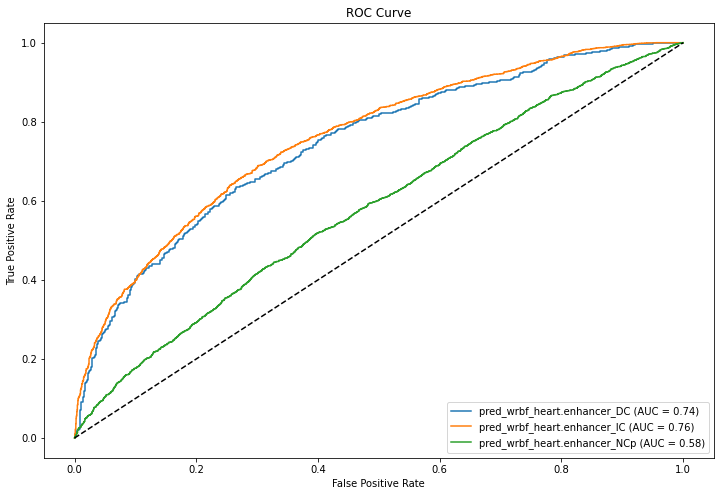

In [10]:
plt.figure(figsize=(12, 8))
plot_roc2("pred_wrbf_heart.enhancer_DC")
plot_roc2("pred_wrbf_heart.enhancer_IC")
plot_roc2("pred_wrbf_heart.enhancer_NCp")
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.savefig('../figures/SVM_pred_enhancer_proj.pdf', dpi = 300)
plt.show()

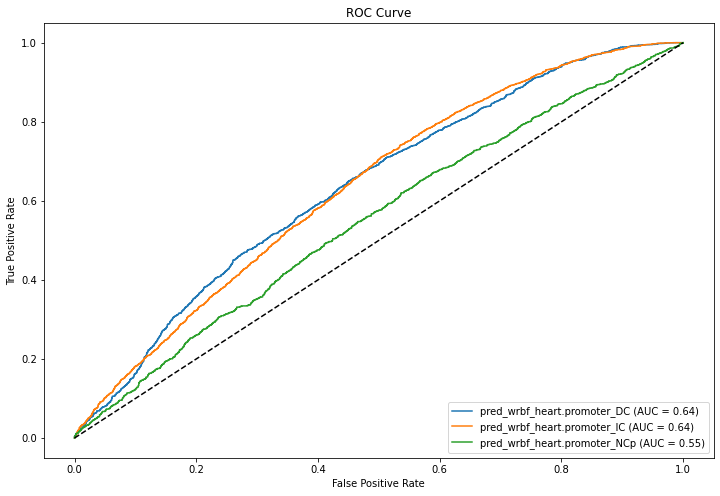

In [11]:
plt.figure(figsize=(12, 8))
plot_roc2("pred_wrbf_heart.promoter_DC")
plot_roc2("pred_wrbf_heart.promoter_IC")
plot_roc2("pred_wrbf_heart.promoter_NCp")
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.savefig('../figures/SVM_pred_promoter_proj.pdf', dpi = 300)
plt.show()

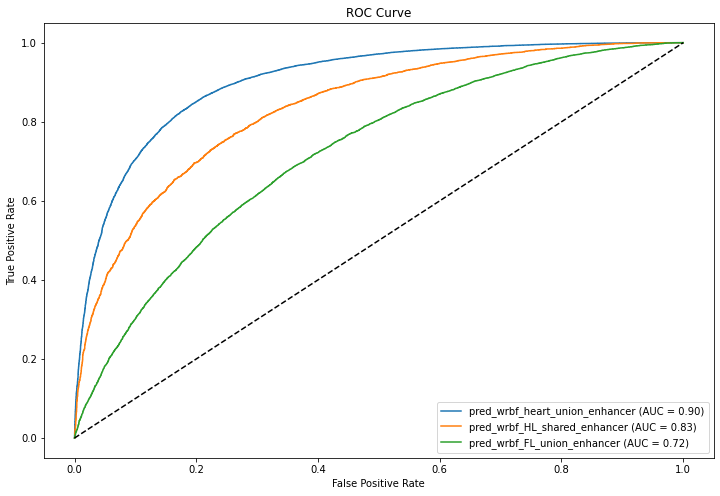

In [12]:
plt.figure(figsize=(12, 8))
plot_roc1("pred_wrbf_heart_union_enhancer")
plot_roc1("pred_wrbf_HL_shared_enhancer")
plot_roc1("pred_wrbf_FL_union_enhancer")
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.savefig('../figures/SVM_pred_ggal_enhancers.pdf', dpi = 300)
plt.show()

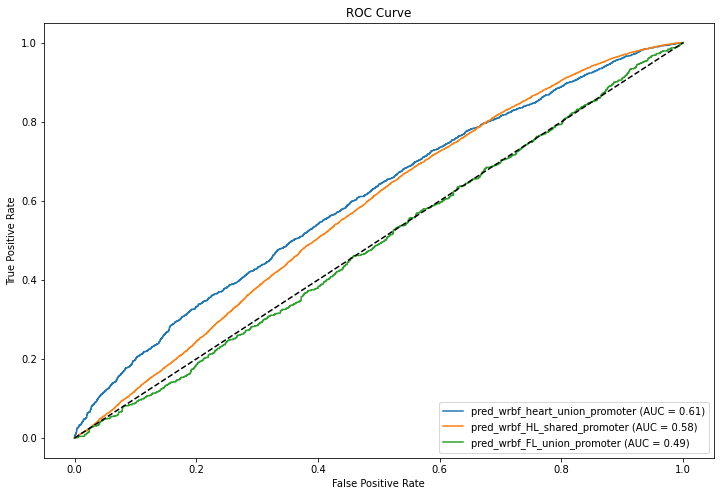

In [13]:
plt.figure(figsize=(12, 8))
plot_roc1("pred_wrbf_heart_union_promoter")
plot_roc1("pred_wrbf_HL_shared_promoter")
plot_roc1("pred_wrbf_FL_union_promoter")
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.savefig('../figures/SVM_pred_ggal_promoters.pdf', dpi = 300)
plt.show()